IMPORTING NECESSARY LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
sns.set_style("whitegrid")

DEFINING BASIC VARIABLES

Choosing 5 high performing stocks from different sectors so that there is as little correlation between them as possible

In [ ]:
NUM_TRADING_DAYS = 252

NUM_SIMULATIONS = 100000

# stocks = ["HDFCBANK.NS", "ICICIBANK", "INFY.NS", "RELIANCE.NS", "TCS.NS", "ITC.NS", "TATAMOTORS.NS", "TATASTEEL.NS", "ADANIENT.NS", "ASIANPAINT.NS"]
# You can get innovative by choosing different stocks

stocks = ["GHCL.NS","IDFCFIRSTB.NS","TATAMOTORS.NS","NH.NS","EMAMILTD.NS"]

start_date = "2015-10-01"
end_date = "2023-10-01"


THINK!                                                                       
Why have we taken the number of trading days as 252?

PULLING THE DATA AND FORMING A DATABASE

In [ ]:
stock_data = {}

for stock in stocks:
    ticker = yf.Ticker(stock)
    stock_data[stock] = ticker.history(start = start_date, end = end_date)['Close']

stock_prices = pd.DataFrame(stock_data)

stock_prices

,GHCL.NS,IDFCFIRSTB.NS,TATAMOTORS.NS,NH.NS,EMAMILTD.NS
Date,,,,,
2015-10-01 00:00:00+05:30,115.294243,NaN,296.704712,NaN,515.869934
2015-10-05 00:00:00+05:30,117.766022,NaN,314.043610,NaN,533.150879
2015-10-06 00:00:00+05:30,116.676765,NaN,332.528534,NaN,513.712646
2015-10-07 00:00:00+05:30,117.388962,NaN,340.151672,NaN,517.565247
2015-10-08 00:00:00+05:30,114.372551,NaN,342.045013,NaN,512.369934
...,...,...,...,...,...
2023-09-25 00:00:00+05:30,617.849976,94.300003,618.700012,1062.050049,506.480377
2023-09-26 00:00:00+05:30,620.549988,95.550003,619.799988,1067.800049,511.299744
2023-09-27 00:00:00+05:30,622.150024,97.550003,620.150024,1081.900024,503.578857


CALCULATING LOG-RETURNS AND ADDING THAT DATA

In [ ]:
log_returns = np.log(stock_prices / stock_prices.shift(1))
log_returns = log_returns.dropna()
# your code here

log_returns # should print a similar database as above

,GHCL.NS,IDFCFIRSTB.NS,TATAMOTORS.NS,NH.NS,EMAMILTD.NS
Date,,,,,
2016-01-07 00:00:00+05:30,-0.084397,-0.032559,-0.063027,-0.018723,-0.010281
2016-01-08 00:00:00+05:30,0.049959,-0.014415,0.028126,-0.010029,0.004588
2016-01-11 00:00:00+05:30,-0.001612,-0.022019,0.019200,0.000305,-0.019319
2016-01-12 00:00:00+05:30,0.004829,-0.026317,-0.014542,0.013044,0.006794
2016-01-13 00:00:00+05:30,-0.018230,-0.023122,0.026683,-0.020861,0.030670
...,...,...,...,...,...
2023-09-25 00:00:00+05:30,-0.017965,0.007451,-0.002825,0.000565,-0.004456
2023-09-26 00:00:00+05:30,0.004360,0.013168,0.001776,0.005399,0.009470
2023-09-27 00:00:00+05:30,0.002575,0.020715,0.000565,0.013118,-0.015216


hint: use np.log with the previous dataframe

CALCULATING AVERAGE ANNUAL RETURNS

In [ ]:
print(log_returns.mean()*NUM_TRADING_DAYS)

GHCL.NS          0.229906
IDFCFIRSTB.NS    0.071283
TATAMOTORS.NS    0.072157
NH.NS            0.155791
EMAMILTD.NS      0.027338
dtype: float64


CALCULATING ANNUAL VOLATILITY

In [ ]:
print(log_returns.std()*np.sqrt(NUM_TRADING_DAYS))

GHCL.NS          0.414898
IDFCFIRSTB.NS    0.392803
TATAMOTORS.NS    0.439411
NH.NS            0.316831
EMAMILTD.NS      0.323710
dtype: float64


## GENERATING RANDOM WEIGHTS AND CHECKING THE RETURN, RISKS ASSOCIATED WITH THEM

Explanation of the code below:


1. `portfolio_weights.append(w)` - The weights of the stocks in the current portfolio are stored in a list for later analysis.

2. `port_return = np.sum(log_returns.mean() * w) * NUM_TRADING_DAYS` - This line calculates the expected return of the portfolio. It does this by multiplying the average (mean) daily returns of the stocks (given by `log_returns.mean()`) by the portfolio weights and then multiplying the result by the number of trading days. In simple terms, it's estimating how much money you might make if you held this portfolio for a year.

3. `portfolio_returns.append(port_return)` - The estimated return for the current portfolio is stored in a list for later analysis.

4. `port_risk = np.sqrt(np.dot(w.T, np.dot(log_returns.cov() * NUM_TRADING_DAYS, w)))` - This line calculates the risk, or standard deviation, of the portfolio. It uses the covariance matrix of the stock returns (log_returns.cov()) to assess how the returns of the different stocks in the portfolio move together. The result is the portfolio's risk, and it's stored in `port_risk`.

5. `portfolio_risks.append(port_risk)` - The portfolio's estimated risk is stored in a list for later analysis.

In summary, this code repeatedly simulates different portfolios of stocks by randomly assigning weights to the stocks and then calculates their expected returns and risks based on historical data. It's a basic way to analyze the performance of various portfolios to understand how different weightings of stocks may affect returns and risk.

In [ ]:
portfolio_weights = []
portfolio_returns = []
portfolio_risks = []


for i in range(NUM_SIMULATIONS):
    w = np.random.random(len(stocks)) #your code here           #create an array of weights for a portfolio (use np.random.random)
    w /= np.sum(w)      #weights for each stock should be fractional
    portfolio_weights.append(w)
    port_return = np.sum(log_returns.mean()*w)*NUM_TRADING_DAYS
    portfolio_returns.append(port_return)
    port_risk = np.sqrt(np.dot(w.T,np.dot(log_returns.cov()*NUM_TRADING_DAYS,w)))
    portfolio_risks.append(port_risk)

We assume the RISK FREE RATE to be 7%

In [ ]:
risk_free_rate = 0.07

CREATING THE DATAFRAME FOR WEIGHTS,RETURNS AND RISKS [basically all the different portfolios]

In [ ]:
porfolio_weights = np.array(portfolio_weights)
portfolio_returns = np.array(portfolio_returns)
portfolio_risks = np.array(portfolio_risks)

sharpe_ratios  = (portfolio_returns - risk_free_rate) / portfolio_risks # your code here                         # use the above variables and the formula for sharpe ratio
portfolios = pd.DataFrame({"Return": portfolio_returns,"Risk": portfolio_risks,"Sharpe": sharpe_ratios })

In [ ]:
portfolios

,Return,Risk,Sharpe
0,0.126772,0.244075,0.232602
1,0.075916,0.255187,0.023185
2,0.128973,0.251394,0.234586
3,0.126886,0.225186,0.252621
4,0.128729,0.286719,0.204831
...,...,...,...
99995,0.128155,0.251309,0.231408
99996,0.138745,0.256826,0.267672
99997,0.093313,0.242992,0.095943
99998,0.140505,0.256800,0.274552


LET'S SEE HOW THE SHARPE RATIO CHANGES FOR DIFFRENT RETURNS AND DIFFRENT RISKS

Plotting it

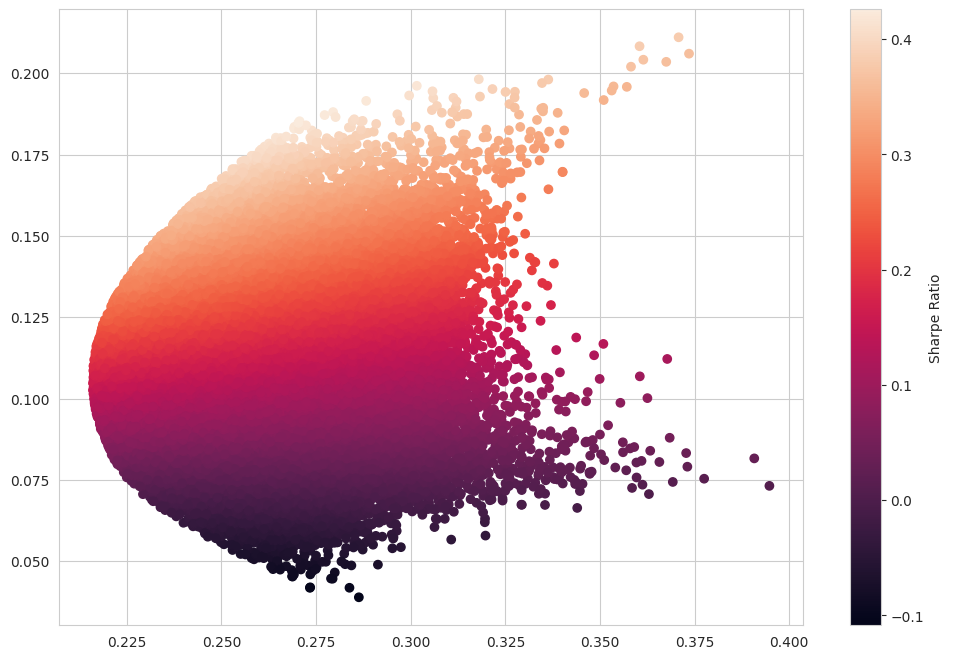

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(portfolio_risks,portfolio_returns,c = sharpe_ratios, marker="o")
plt.grid(True)
plt.xlabel = ("Expected Risk")
plt.ylabel = ("Expected Return")
plt.colorbar(label = "Sharpe Ratio")

plt.show()

THE CURVE IS ALMOST A PERFECT HYPERBOLA!

This is also called the "Markowitz Bullet"

The upper part of the curve is referred to as the "Efficient Frontier"


The efficient frontier is the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. Portfolios that lie below the efficient frontier are sub-optimal because they do not provide enough return for the level of risk.

First let's find out the Portfolio with the maximum Sharpe Ratio

In [ ]:

ind = 0

for i in range(len(sharpe_ratios)):
    if(sharpe_ratios[i] == np.amax(sharpe_ratios)):
        ind = i

In [ ]:
print("Maximum Sharpe Ratio = ",sharpe_ratios[ind])
print("Corresponding Return =  ",portfolio_returns[ind])
print("Corresponding Risk =  ",portfolio_risks[ind])

Maximum Sharpe Ratio =  0.42582466234753186
Corresponding Return =   0.18524373270088618
Corresponding Risk =   0.2706365856443311


SO HERE WE HAVE OUR MAX SHARPE RATIO PORTFOLIO

In [ ]:
for i in range(len(stocks)):
    print(stocks[i], ':', portfolio_weights[ind][i])

GHCL.NS : 0.4559938930446224
IDFCFIRSTB.NS : 0.008766544272230326
TATAMOTORS.NS : 0.02572901810609672
NH.NS : 0.498220060962819
EMAMILTD.NS : 0.011290483614231493


Plotting the point of our portfolio with max sharpe

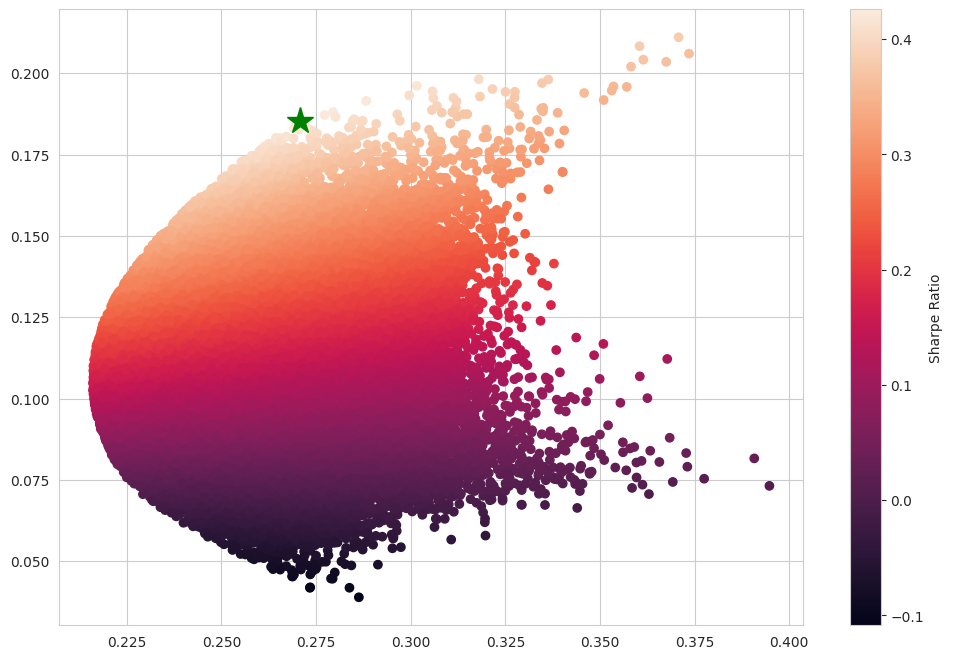

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(portfolio_risks,portfolio_returns,c = sharpe_ratios, marker="o")
plt.grid(True)
plt.xlabel = ("Expected Risk")
plt.ylabel = ("Expected Return")
plt.colorbar(label = "Sharpe Ratio")
plt.plot(portfolio_risks[ind],portfolio_returns[ind], 'g*',markersize = 20.0)


plt.show()

Now let's make a minimum risk portfolio

In [ ]:
ind = 0

#your code here                                   #get the index of the minimum risk portfolio
for i in range(len(portfolio_risks)):
    if(portfolio_risks[i] == np.amin(portfolio_risks)):
        ind = i
print(ind)

95119


In [ ]:
print("Minimum Risk = ",portfolio_risks[ind])
print("Corresponding Return =  ",portfolio_returns[ind])

Minimum Risk =  0.2160700229275212
Corresponding Return =   0.10478846753996043


In [ ]:
for i in range(len(stocks)):
    print(stocks[i], ':', portfolio_weights[ind][i])

GHCL.NS : 0.11000031826027261
IDFCFIRSTB.NS : 0.10942522536153385
TATAMOTORS.NS : 0.054445461550891146
NH.NS : 0.37304772002897835
EMAMILTD.NS : 0.3530812747983241


As we can see, this portfolio is very very different

Also we can see our calculations show us the basics of finance, when the risk is less, the returns are less

Plotting the point of our portfolio with minimum risk

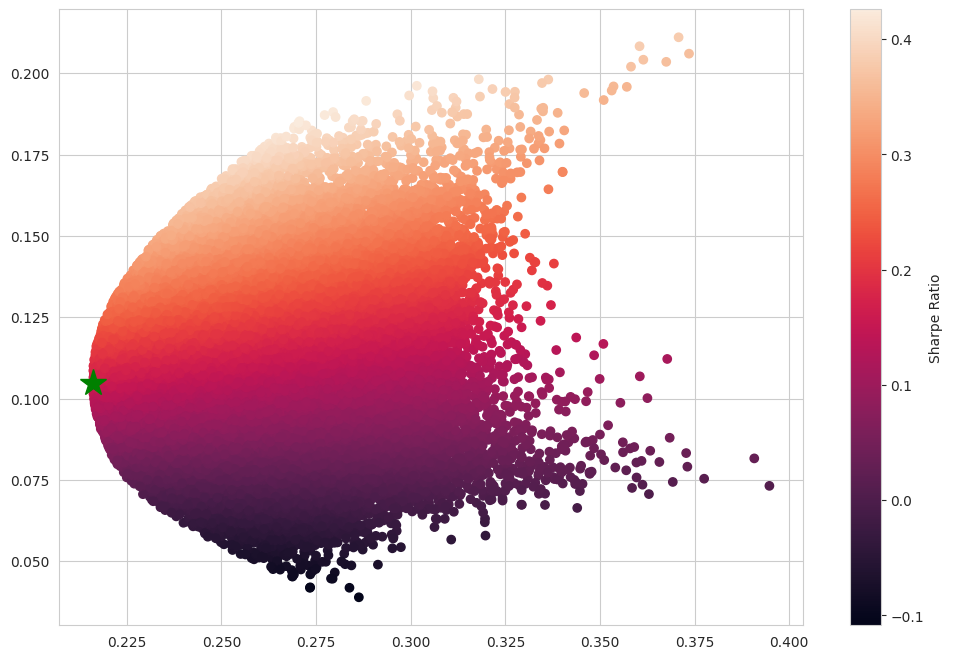

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(portfolio_risks,portfolio_returns,c = sharpe_ratios, marker="o")
plt.grid(True)
plt.xlabel = ("Expected Risk")
plt.ylabel = ("Expected Return")
plt.colorbar(label = "Sharpe Ratio")
plt.plot(portfolio_risks[ind],portfolio_returns[ind], 'g*',markersize = 20.0)


plt.show()

We can see the star is at the turning point of the hyperbola, as it signifies the point where the portfolio has least risk

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf

NUM_TRADING_DAYS = 252
RISK_FREE_RATE = 0.07
NUM_SIMULATIONS = 100000

# Stock data retrieval
stocks = ["GHCL.NS", "IDFCFIRSTB.NS", "TATAMOTORS.NS", "NH.NS", "EMAMILTD.NS"]
start_date = "2015-10-01"
end_date = "2023-10-01"

stock_data = {}
for stock in stocks:
    ticker = yf.Ticker(stock)
    stock_data[stock] = ticker.history(start=start_date, end=end_date)['Close']
stock_prices = pd.DataFrame(stock_data)

# Log returns calculation
log_returns = np.log(stock_prices / stock_prices.shift(1))
log_returns = log_returns.dropna()

# Baseline: Equal-weighted portfolio
equal_weights = np.ones(len(stocks)) / len(stocks)
baseline_return = np.sum(log_returns.mean() * equal_weights) * NUM_TRADING_DAYS
baseline_risk = np.sqrt(np.dot(equal_weights.T, np.dot(log_returns.cov() * NUM_TRADING_DAYS, equal_weights)))
baseline_sharpe_ratio = (baseline_return - RISK_FREE_RATE) / baseline_risk

print(f"Baseline Sharpe Ratio: {baseline_sharpe_ratio:.2f}")
print(f"Baseline Return: {baseline_return:.2f}")
print(f"Baseline Risk: {baseline_risk:.2f}")

# Simulate portfolios
portfolio_weights = []
portfolio_returns = []
portfolio_risks = []

for _ in range(NUM_SIMULATIONS):
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)
    portfolio_weights.append(weights)
    port_return = np.sum(log_returns.mean() * weights) * NUM_TRADING_DAYS
    portfolio_returns.append(port_return)
    port_risk = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * NUM_TRADING_DAYS, weights)))
    portfolio_risks.append(port_risk)

portfolio_weights = np.array(portfolio_weights)
portfolio_returns = np.array(portfolio_returns)
portfolio_risks = np.array(portfolio_risks)

# Calculate Sharpe ratios
sharpe_ratios = (portfolio_returns - RISK_FREE_RATE) / portfolio_risks

# Find the highest Sharpe ratio after optimization
max_sharpe_ratio_after = np.max(sharpe_ratios)
max_sharpe_ratio_after_idx = np.argmax(sharpe_ratios)
optimal_return = portfolio_returns[max_sharpe_ratio_after_idx]
optimal_risk = portfolio_risks[max_sharpe_ratio_after_idx]

# Calculate improvement percentages
sharpe_ratio_improvement = (max_sharpe_ratio_after - baseline_sharpe_ratio) / baseline_sharpe_ratio * 100
return_improvement = (optimal_return - baseline_return) / baseline_return * 100
risk_reduction = (baseline_risk - optimal_risk) / baseline_risk * 100

print(f"Sharpe Ratio Improvement: {sharpe_ratio_improvement:.2f}%")
print(f"Return Improvement: {return_improvement:.2f}%")
print(f"Risk Reduction: {risk_reduction:.2f}%")

Baseline Sharpe Ratio: 0.18
Baseline Return: 0.11
Baseline Risk: 0.24
Sharpe Ratio Improvement: 149.82%
Return Improvement: 73.14%
Risk Reduction: -18.30%
